15 November 2023

# Raster Manipulation

## Data

We will use data from the Copernicus Digital Elevation Model (DEM). This dataset ris based on radar satellite data measuring the relative height of Earth’s surface. The Copernicus DEM is available at 30-meter and 90-meter resolution. The data prepared for this class is a tile of 1°x1° latitude/longitude form the Copernicus DEM at 90-meter resolution over the Grand Canyon in the US. Each pixel represents vertical units measured in meters. The data was accessed via the Microsoft’s Planetary Computer Copernicus DEM GLO-30 data repository

In [1]:
import os
import numpy as np

import xarray as xr
import rioxarray as rioxr

In [7]:
gc = rioxr.open_rasterio(os.path.join(os.getcwd(),'raster_data', 'grand_canyon_DEM.tif'))
gc

<xarray.DataArray (band: 1, y: 1200, x: 1200)>
[1440000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 37.0 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

EPSG:4326


(array([  8673.,  25324.,  69304., 169736., 359588., 382075., 160902.,
         85976., 102555.,  75867.]),
 array([ 528.    ,  756.0801,  984.1601, 1212.2401, 1440.3202, 1668.4003,
        1896.4803, 2124.5603, 2352.6404, 2580.7205, 2808.8005],
       dtype=float32),
 <BarContainer object of 10 artists>)

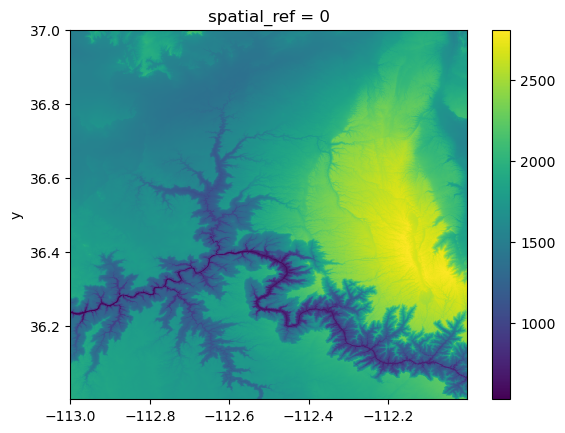

In [19]:
print(gc.rio.crs)
gc.plot()

(array([  368.,  1002.,  1763.,  2381.,  3159.,  3607.,  3764.,  4101.,
         5526.,  8326.,  9853.,  9862., 11583., 15865., 22141., 31803.,
        29119., 25586., 32636., 50592., 59436., 76685., 89187., 73194.,
        61086., 65553., 97401., 81974., 76432., 60715., 44639., 37562.,
        29224., 25343., 24134., 18892., 16106., 16701., 16172., 18105.,
        17835., 18320., 20887., 21894., 23619., 20837., 19375., 17494.,
        12246.,  5915.]),
 array([ 528.     ,  573.616  ,  619.232  ,  664.848  ,  710.46405,
         756.0801 ,  801.69604,  847.3121 ,  892.9281 ,  938.54407,
         984.1601 , 1029.7761 , 1075.3921 , 1121.0082 , 1166.6241 ,
        1212.2401 , 1257.8562 , 1303.4722 , 1349.0881 , 1394.7042 ,
        1440.3202 , 1485.9363 , 1531.5522 , 1577.1682 , 1622.7843 ,
        1668.4003 , 1714.0162 , 1759.6323 , 1805.2483 , 1850.8643 ,
        1896.4803 , 1942.0963 , 1987.7124 , 2033.3284 , 2078.9443 ,
        2124.5603 , 2170.1763 , 2215.7925 , 2261.4084 , 2307.0244 

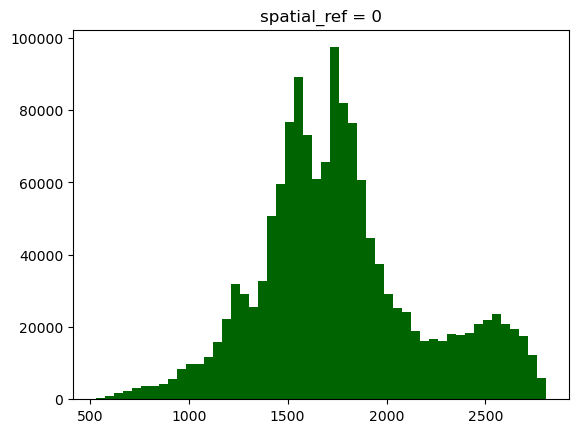

In [24]:
gc.plot.hist(bins = 50, color = "darkgreen")

Notice that our raster has an unnecessary extra dimension: band.

This is making this datsets three-dimensional when it is not needed. We can clean this `xarray.DataArray` a bit by:

1. using the `squeeze()` method. If we don’t pass any parameters, then `squeeze()` gets rid of all dimensions with length one, and then

2. getting rid of the associated coordinates for this dimension. We can do this using the `xarray.DataArray` `drop()` method and specifying the name of the coordinates we want to remove, in this case `band`.

In [8]:
# original dimensions and coordinates
print(gc.dims, gc.coords,'\n')

# remove length 1 dimension (band)
gc = gc.squeeze()
print(gc.dims, gc.coords,'\n')

# remove coordinates associated to band
gc = gc.drop('band')
print(gc.dims, gc.coords)

('band', 'y', 'x') Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 37.0 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 0 

('y', 'x') Coordinates:
    band         int64 1
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 37.0 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 0 

('y', 'x') Coordinates:
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 37.0 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 0


## Global Information

To get a better sense of our raster data we can apply common `numpy` functions to extract information from the `xarray.DataArray` underlying `np.array`.

For example, we can get the maximum across all the `xarray.DataArray`’s values by using the `max()` method:

In [25]:
# get the maximum elevation value (get an xarray.DataArray)
gc.max()

<xarray.DataArray ()>
array(2808.80053711)
Coordinates:
    spatial_ref  int64 0

In [26]:
# get the maximum elevation value as a number
gc.max().item()

2808.800537109375

## f-strings

Another popular way of mixing strings and variables in print statements is by creating an f-string which stands for “formatted string”. The simplest syntax for an f-string is:

```
f" some text {replace}"
```

where `replace` can be a variable, an expression, or a function or method call. For example:

In [27]:
# f-string with mean elevation
f"Mean elevation: {gc.mean().item()}"

'Mean elevation: 1764.859375'

In [34]:
# median elevation, rounded to two decimals
# print via f-string formatting
print(f"Median elevation: {gc.median().item():.2f}") # f in .2f stands for 'float'; the number of decimals

Median elevation: 1726.15


## Aggregation

Let’s go back to our raster. Rasters with high spatial resolution can offer great insight into fine-scale patterns, but can also be challenging to process due to their size. In these cases, it can be useful to use an aggregation method to spatially downsample and obtain a raster with a coarser resolution.

To spatially downsample an `xarray.DataArray` we use the `coarsen()` method followed by an aggreagator function.

Suppose we want to coarsen our Grand Canyon elevation raster from 1200x1200 pixels to a raster of 60x60 pixels where by calculating the maximun at each window. Remember the windows are non-overlapping, so we will obtain one pixel per window. A quick division tells us that to got from 1200x1200 to 60x60 we will need to use a 20x20 window. The aggregator function on each of this window will be max(). Our call looks like this:

In [29]:
# coarsen to a 60x60 raster calculating the mean in each window
gc_coarse = gc.coarsen(x=20,y=20).mean()
gc_coarse

<xarray.DataArray (y: 60, x: 60)>
array([[1517.0162, 1521.1807, 1614.4452, ..., 1602.1825, 1632.0491,
        1647.5757],
       [1500.3119, 1524.7173, 1622.7725, ..., 1643.7584, 1640.7683,
        1764.919 ],
       [1489.5236, 1512.9801, 1547.7728, ..., 1641.8906, 1645.771 ,
        1789.8911],
       ...,
       [1914.765 , 1878.8464, 1802.3844, ..., 1501.9019, 1236.4778,
        1229.7344],
       [1917.3566, 1879.9749, 1859.9656, ..., 1414.1925, 1329.0782,
        1388.1653],
       [1919.9823, 1890.4172, 1868.7794, ..., 2007.9066, 1726.9645,
        1778.2673]], dtype=float32)
Coordinates:
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 36.99 36.98 36.96 36.94 ... 36.06 36.04 36.03 36.01
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

old resolution: 1200x1200
coarse resolution: 60x60


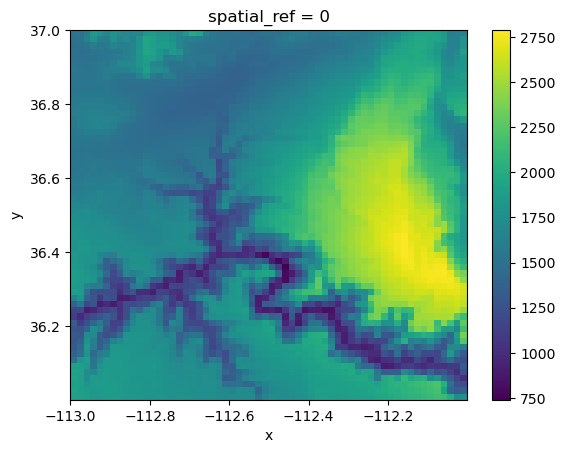

In [30]:
# inspect old and coarsened resolution
print(f"old resolution: {gc.rio.width}x{gc.rio.height}")
print(f"coarse resolution: {gc_coarse.rio.width}x{gc_coarse.rio.height}")
gc_coarse.plot()

## Exercise

1. Downsample the raster into a 240x240 raster by taking the average over windows of the appropriate size.
2. Use f-strings to check whether the bounds of the raters have changed. 

In [37]:
gc_coarse2

<xarray.DataArray (y: 240, x: 240)>
array([[1535.3939, 1535.8931, 1532.352 , ..., 1625.2432, 1551.3588,
        1563.1356],
       [1521.945 , 1521.6814, 1521.8566, ..., 1584.5142, 1627.8928,
        1593.6633],
       [1509.4419, 1511.2308, 1509.6614, ..., 1609.3103, 1700.0897,
        1650.7216],
       ...,
       [1932.3878, 1923.3806, 1905.713 , ..., 1738.6489, 1604.5614,
        1512.9637],
       [1941.5138, 1928.9819, 1911.285 , ..., 2034.8147, 1858.8019,
        1736.1644],
       [1938.8174, 1919.249 , 1919.581 , ..., 2261.3406, 2198.5483,
        2007.7867]], dtype=float32)
Coordinates:
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 37.0 36.99 36.99 36.99 ... 36.02 36.01 36.01 36.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

old bounds: [-113.0004   36.0004 -112.0004   37.0004]
new bounds: [-112.9988   36.0021 -112.0021   36.9988]


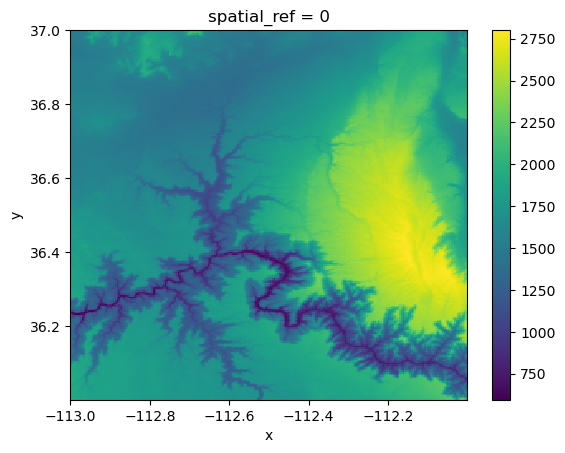

In [53]:
gc_coarse2 = gc.coarsen(x=5,y=5).mean()

print(f"old bounds: {np.round(gc.rio.bounds(), 4)}")
print(f"new bounds: {np.round(gc_coarse2.rio.bounds(), 4)}")

gc_coarse2.plot()